## Text mining

In [3]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk

## Loading data

In [4]:
mydata = pd.read_excel("Miller.xlsx", index_col = 0)
mydata

id            author_id                created_at  \
0     1609308674538749955            148556313  2022-12-31T22:01:02.000Z   
1     1609236575636062209           1834062690  2022-12-31T17:14:32.000Z   
2     1609202727535484930             18314105  2022-12-31T15:00:02.000Z   
3     1608993774134505473  1450661893899575300  2022-12-31T01:09:44.000Z   
4     1608946755655303172           1330129106  2022-12-30T22:02:53.000Z   
...                   ...                  ...                       ...   
2606  1477430350750048259            509550188  2022-01-02T00:03:39.000Z   
2607  1477293565365604352             18314105  2022-01-01T15:00:07.000Z   
2608  1477138433164328961  1241557112062455808  2022-01-01T04:43:41.000Z   
2609  1477136503373373440             30818008  2022-01-01T04:36:00.000Z   
2610  1477122488412872706             45117960  2022-01-01T03:40:19.000Z   

           type  retweet_count  reply_count  like_count  quote_count  \
0      original              1            0           2            0   
1        quoted              0            0           1            0   
2      original              0            0           1            0   
3     retweeted              9            0           0            0   
4      original              0            0           1            0   
...         ...            ...          ...         ...          ...   
2606   original              0            0           0            0   
2607   original              0            0           1            0   
2608   original              0            0           3            0   
2609   original              0            0           0            0   
2610   original              0            0           0            0   

                                                   text         username  \
0     It’s 5pm. Let’s go grab a ____.\nA. Beer\nB. B...  superior_bevgrp   
1     #CowboysNation #DallasCowboys WIN #12 https://...       Bada_bing3   
2     Happy New Year from Miller Lite and Southern D...  Southern_Laredo   
3     RT @Ol_TimeFootball Ray Nitschke’s favourite b...     FordhamBurgh   
4     Newest addition to the bear cave🔥. Chicagoland...   ThethirdAtwood   
...                                                 ...              ...   
2606  New Year; Same Crazy Rock &amp; Sports Bar☘️ Y...  LuckyIrishPubPR   
2607  Go Cowboys! Miller Lite. The Only Beer of The ...  Southern_Laredo   
2608  So gonna kiss this can at midnight #NewYear #m...      dannybroman   
2609  Cheers to everyone! #newyearseve #millerlite h...         marcop85   
2610  Bringing in New Years fuck 2021 #fuck2021 #hap...      bigdawg1025   

      follower_count  following_count       date  
0               6636              291 2022-12-31  
1               1178             1316 2022-12-31  
2                811              250 2022-12-31  
3                  6               23 2022-12-31  
4                151              380 2022-12-30  
...              ...              ...        ...  
2606              50               81 2022-01-02  
2607             811              250 2022-01-01  
2608             102              164 2022-01-01  
2609             179              931 2022-01-01  
2610             137              337 2022-01-01  

[2611 rows x 13 columns]

# NLTK POS tagging

In [5]:
mydata['tokenized'] = mydata['text'].str.lower().apply(nltk.word_tokenize)
mydata['tagged'] = mydata['tokenized'].apply(nltk.pos_tag) # a list of tuples

words = []
tags = []
for list1 in mydata['tagged']:
    for list2 in list1:
        word, tag = list2
        words.append(word)
        tags.append(tag)

word_tag = pd.DataFrame(list(zip(words, tags)), columns = ['words', 'tags'])
word_tag_df = pd.DataFrame(word_tag.groupby(['words', 'tags'])['words'].count()).rename(columns = {'words': 'freq'}).reset_index().sort_values('words')
word_tag_df

words tags   freq
0             !    .   2179
1             #    #  14066
2             $    $    486
3             %   NN     55
4             &   CC    656
...         ...  ...    ...
10036         🪣   VB      5
10037         🪣  VBD      1
10039        🪣-   VB      3
10038        🪣-   JJ      1
10040  🫵🏼🎤🎼☘️🤘🏼   JJ      1

[10041 rows x 3 columns]

# Text cleaning

In [6]:
# Remove URLS
word_tag_df["words"] = word_tag_df["words"].str.replace(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', 
                                                        '', flags=re.UNICODE, regex = True) 
# Remove Emoticons
word_tag_df["words"] = word_tag_df["words"].str.replace("[^\w\s#@/:%.,_-]", '', flags=re.UNICODE, regex = True) 
word_tag_df["words"] = word_tag_df["words"].apply(lambda x: re.split("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", str(x))[0])
# Remove Special characters
word_tag_df["words"] = word_tag_df['words'].str.replace('[^A-Za-z\s]+', '', regex = True)

# Remove Stopwords
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
word_tag_df["words"] = word_tag_df["words"].str.replace(pat, '', regex = True)
word_tag_df = word_tag_df[word_tag_df.words != ""].sort_values(['freq'], ascending=False)
word_tag_df

words tags  freq
5284               https   NN  2771
6336          millerlite   JJ  2034
7760                  rt   NN  1009
2633                beer   NN   910
2307                 amp   NN   610
...                  ...  ...   ...
6290     michgoldenlight  VBD     1
6291  michiganbbqaddicts  NNS     1
6292             midweek   NN     1
6293            midnight   NN     1
11                   bar   ''     1

[7370 rows x 3 columns]

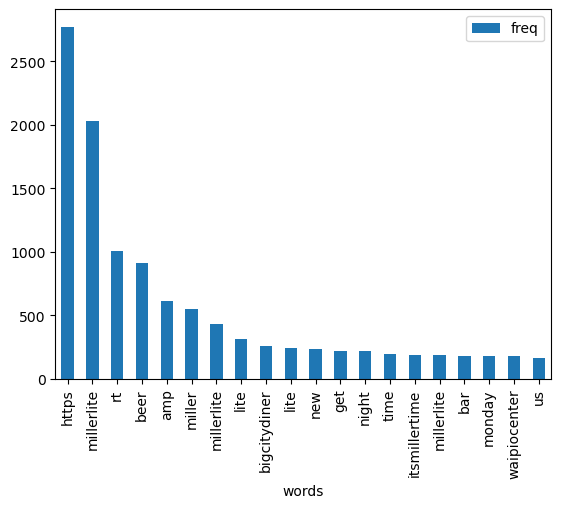

In [7]:
## Word frequency visuaization
word_tag_df[0:20].plot.bar(x="words")

In [19]:
word_tag_df.to_excel("Miller_word_freq.xlsx")